[*********************100%***********************]  2 of 2 completed


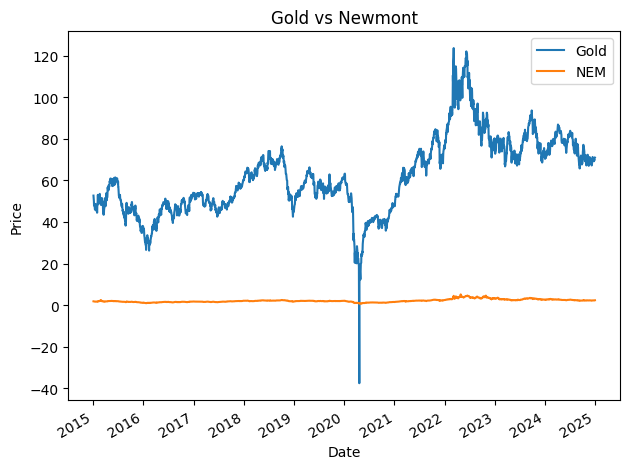

Gold ADF Statistic: -2.1469, p-value: 0.2261
NEM ADF Statistic: -1.9305, p-value: 0.3179
Gold Δ ADF Statistic: -34.1840, p-value: 0.0000
NEM Δ ADF Statistic: -21.6170, p-value: 0.0000
Trace Statistic: [50.96382923  4.8986314 ]
Critical Values (90%, 95%, 99%):
 [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Det. terms outside the coint. relation & lagged endog. parameters for equation Gold
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.Gold       -0.2594      0.022    -11.571      0.000      -0.303      -0.215
L1.NEM         3.9728      0.792      5.019      0.000       2.421       5.524
Det. terms outside the coint. relation & lagged endog. parameters for equation NEM
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.Gold    -7.561e-06      0.001     -0.012      0.991      -0.001       0.001
L1.NEM         0.0827      0.023      3.633      0.000       0.038       0.127
                Loading coefficients (alpha) for equation Gold                
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------

<ipython-input-11-aaa7e34532ec>:46: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_df = pd.DataFrame(forecast, columns=['Gold', 'NEM'], index=pd.date_range(df.index[-1], periods=12, freq='M'))


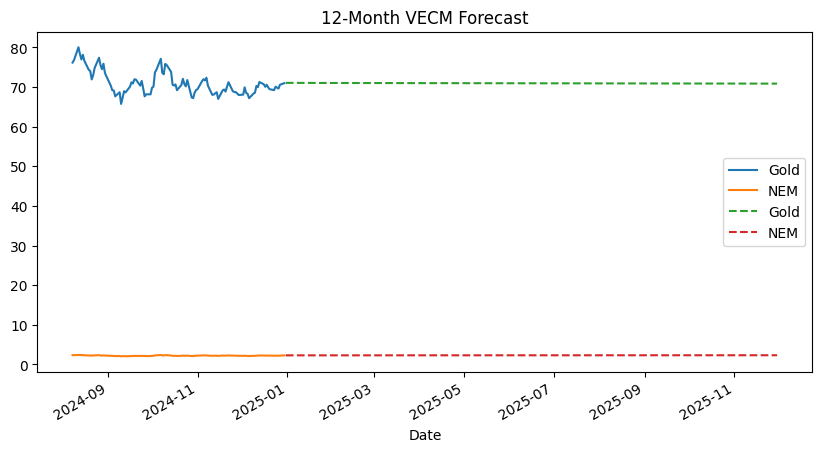

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 25, Apr, 2025
Time:                     13:40:56
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -4.39499
Nobs:                     2511.00    HQIC:                  -4.40386
Log likelihood:          -1584.52    FPE:                  0.0121684
AIC:                     -4.40891    Det(Omega_mle):       0.0121394
--------------------------------------------------------------------
Results for equation Gold
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           0.009501         0.041974            0.226           0.821
L1.Gold        -0.265166         0.022203          -11.943           0.000
L1.NEM          4.100550         0.789186            5.196           0.000

Results f

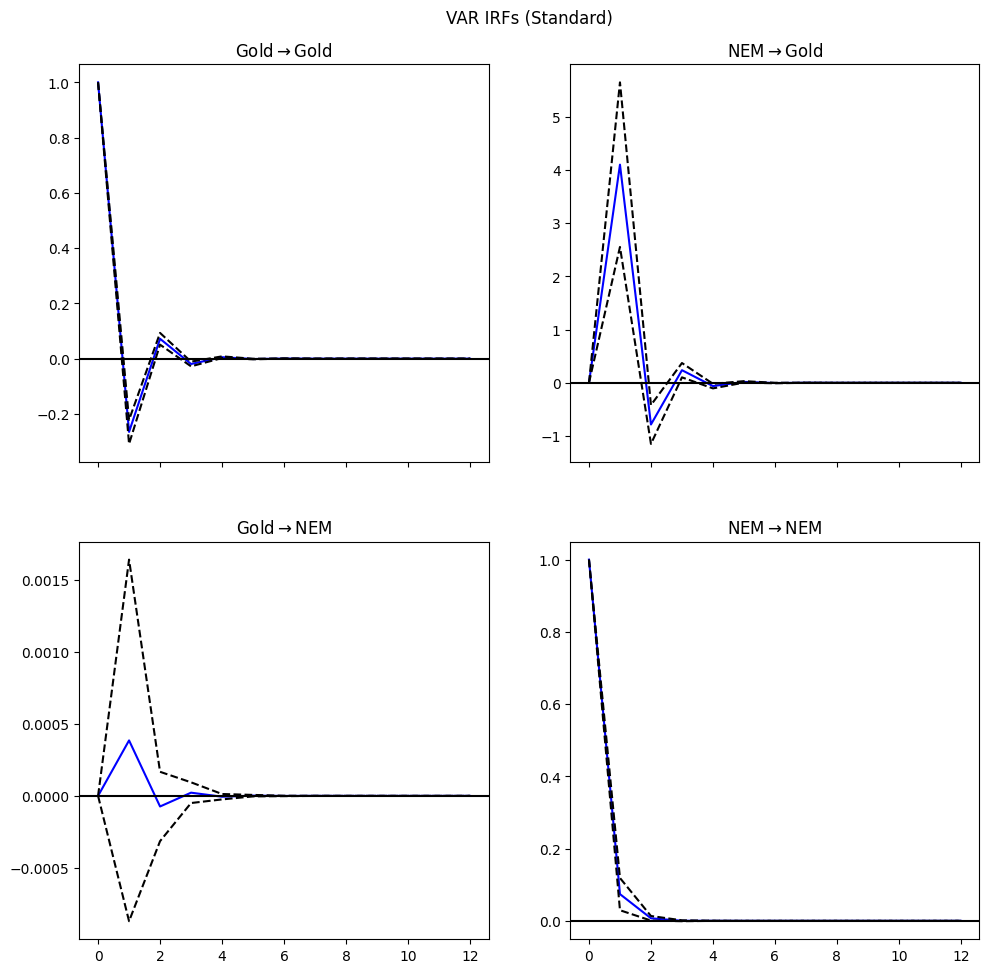

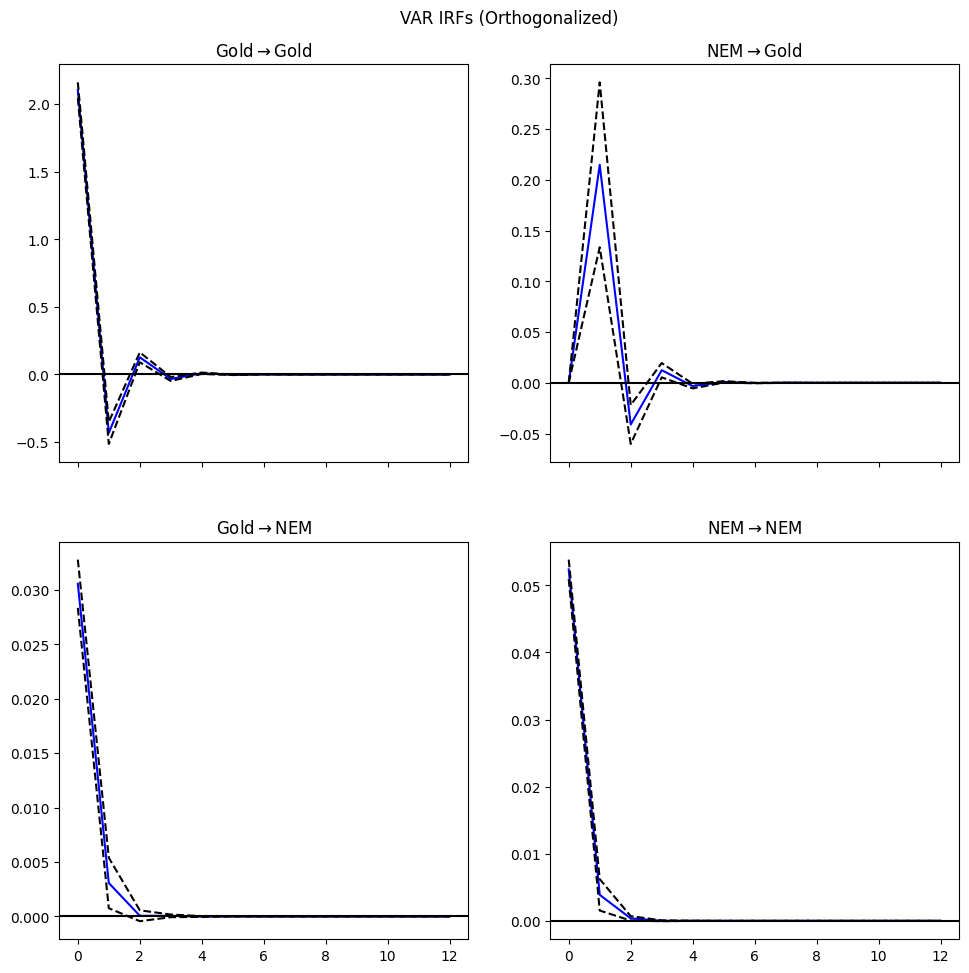

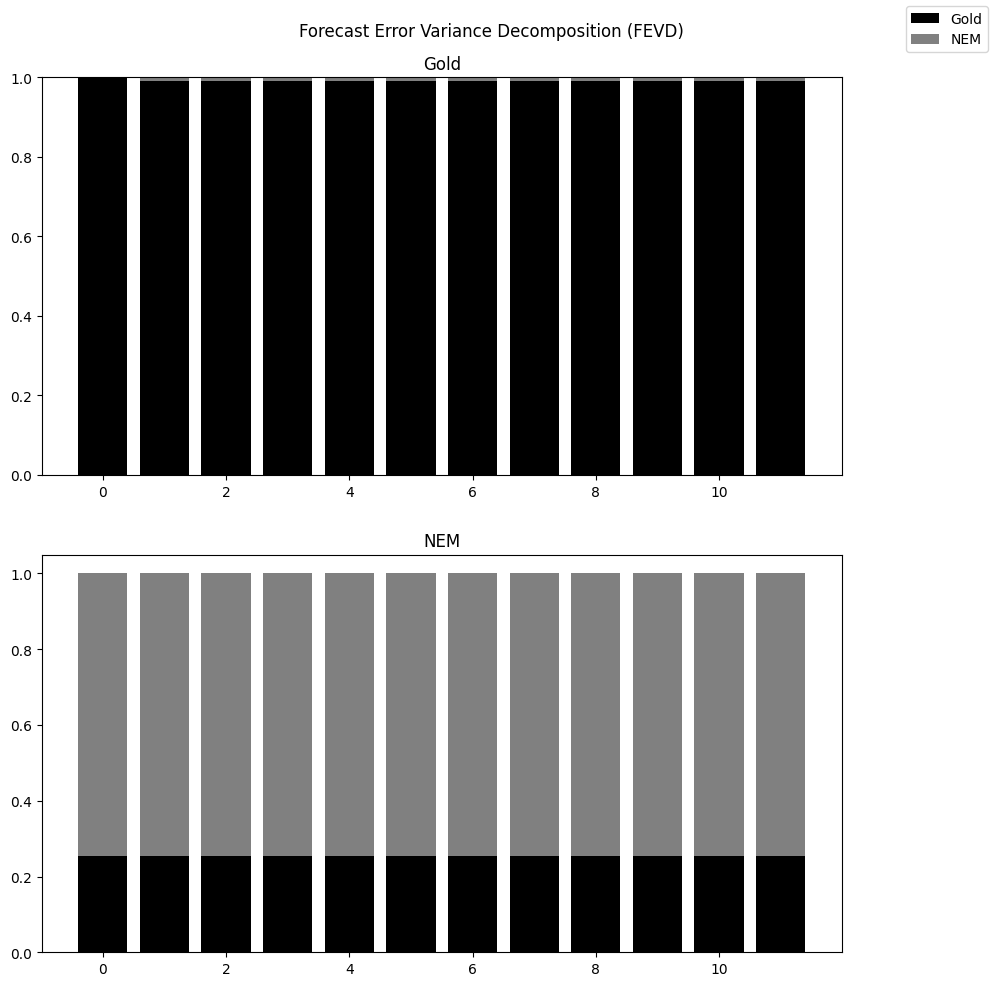

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Download data
symbols = ['HO=F', 'CL=F']  # Gold Futures and Newmont
df = yf.download(symbols, start="2015-01-01", end="2024-12-31")['Close']
df.dropna(inplace=True)
df.columns = ['Gold', 'NEM']

# Plot
df.plot(title="Gold vs Newmont")
plt.ylabel("Price")
plt.xlabel("Date")
plt.tight_layout()
plt.savefig("cointegration_series.png")
plt.show()


def adf_test(series, name):
    result = adfuller(series)
    print(f"{name} ADF Statistic: {result[0]:.4f}, p-value: {result[1]:.4f}")

adf_test(df['Gold'], 'Gold')
adf_test(df['NEM'], 'NEM')

# Now first difference
adf_test(df['Gold'].diff().dropna(), 'Gold Δ')
adf_test(df['NEM'].diff().dropna(), 'NEM Δ')

jres = coint_johansen(df, det_order=0, k_ar_diff=1)
trace_stat = jres.lr1
crit_values = jres.cvt

print("Trace Statistic:", trace_stat)
print("Critical Values (90%, 95%, 99%):\n", crit_values)

vecm_model = VECM(df, k_ar_diff=1, coint_rank=1)
vecm_res = vecm_model.fit()
print(vecm_res.summary())

forecast = vecm_res.predict(steps=12)
forecast_df = pd.DataFrame(forecast, columns=['Gold', 'NEM'], index=pd.date_range(df.index[-1], periods=12, freq='M'))

# Plot forecasts
df[-100:].plot(figsize=(10,5), label='Historical')
forecast_df.plot(ax=plt.gca(), style='--')
plt.title("12-Month VECM Forecast")
plt.savefig("vecm_forecast.png")
plt.show()


# First difference to make series stationary
diff_df = df.diff().dropna()

from statsmodels.tsa.api import VAR

# Fit VAR model
model = VAR(diff_df)
var_res = model.fit(maxlags=1)
print(var_res.summary())

# IRF up to 12 steps
irf = var_res.irf(12)

# Plot standard IRFs
irf.plot(orth=False)
plt.suptitle("VAR IRFs (Standard)")
plt.savefig("var_irf_standard.png")
plt.show()

# Orthogonalized IRFs
irf.plot(orth=True)
plt.suptitle("VAR IRFs (Orthogonalized)")
plt.savefig("var_irf_orthogonalized.png")
plt.show()

# Forecast Error Variance Decomposition
fevd = var_res.fevd(12)
fevd.plot()
plt.suptitle("Forecast Error Variance Decomposition (FEVD)")
plt.savefig("var_fevd.png")
plt.show()

Gold ADF Statistic: 0.4462, p-value: 0.9831
NEM ADF Statistic: -1.9543, p-value: 0.3070
Gold Δ ADF Statistic: -51.7939, p-value: 0.0000
NEM Δ ADF Statistic: -21.6963, p-value: 0.0000


Trace Statistic: [8.49231174 2.42418247]
Critical Values (90%, 95%, 99%):
 [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Det. terms outside the coint. relation & lagged endog. parameters for equation Gold
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.Gold       -0.1151      0.024     -4.713      0.000      -0.163      -0.067
L1.NEM         2.5379      0.447      5.677      0.000       1.662       3.414
Det. terms outside the coint. relation & lagged endog. parameters for equation NEM
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.Gold        0.0019      0.001      1.405      0.160      -0.001       0.005
L1.NEM        -0.0065      0.025     -0.264      0.792      -0.055       0.042
                Loading coefficients (alpha) for equation Gold                
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------

<ipython-input-7-7231228db750>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_df = pd.DataFrame(forecast, columns=['Gold', 'NEM'], index=pd.date_range(df.index[-1], periods=12, freq='M'))


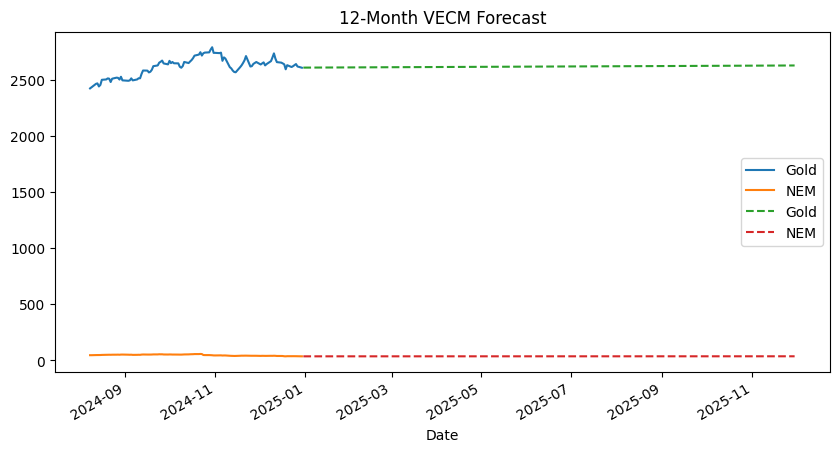

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 25, Apr, 2025
Time:                     13:38:12
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    4.78440
Nobs:                     2510.00    HQIC:                   4.77552
Log likelihood:          -13104.0    FPE:                    117.974
AIC:                      4.77046    Det(Omega_mle):         117.693
--------------------------------------------------------------------
Results for equation Gold
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           0.600885         0.312209            1.925           0.054
L1.Gold        -0.113202         0.024408           -4.638           0.000
L1.NEM          2.505273         0.447143            5.603           0.000

Results f

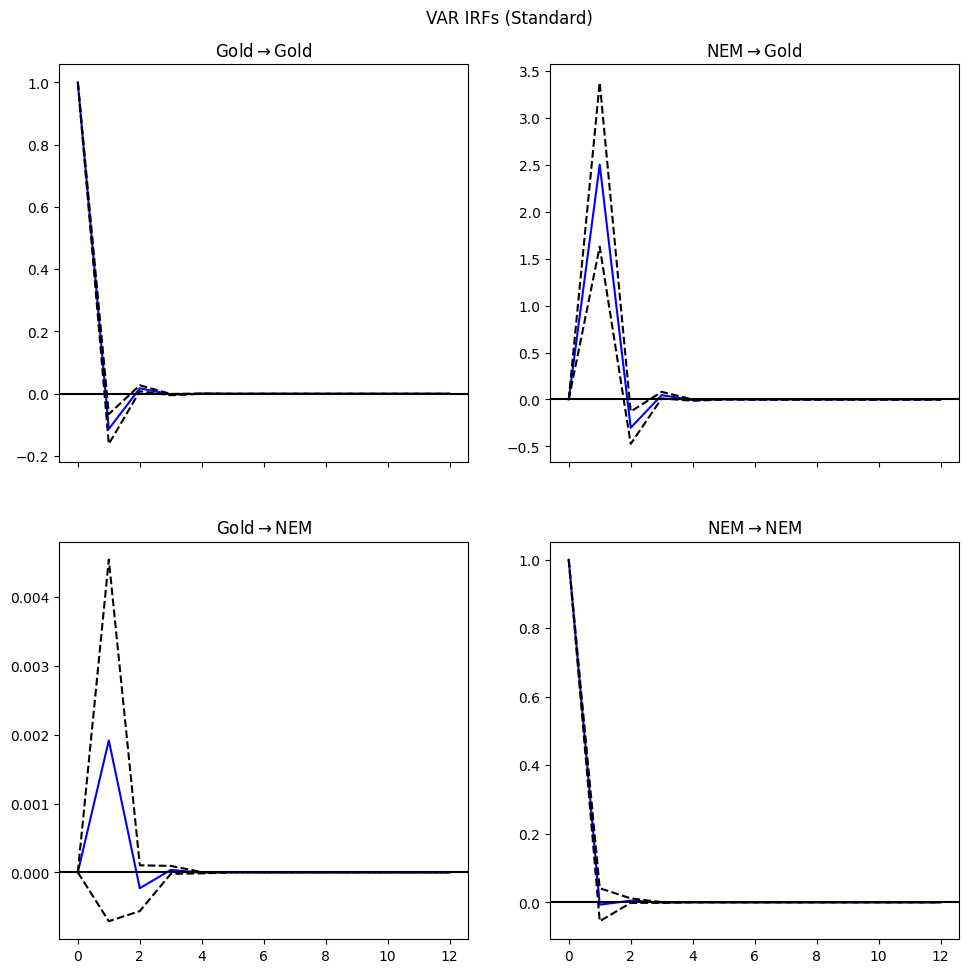

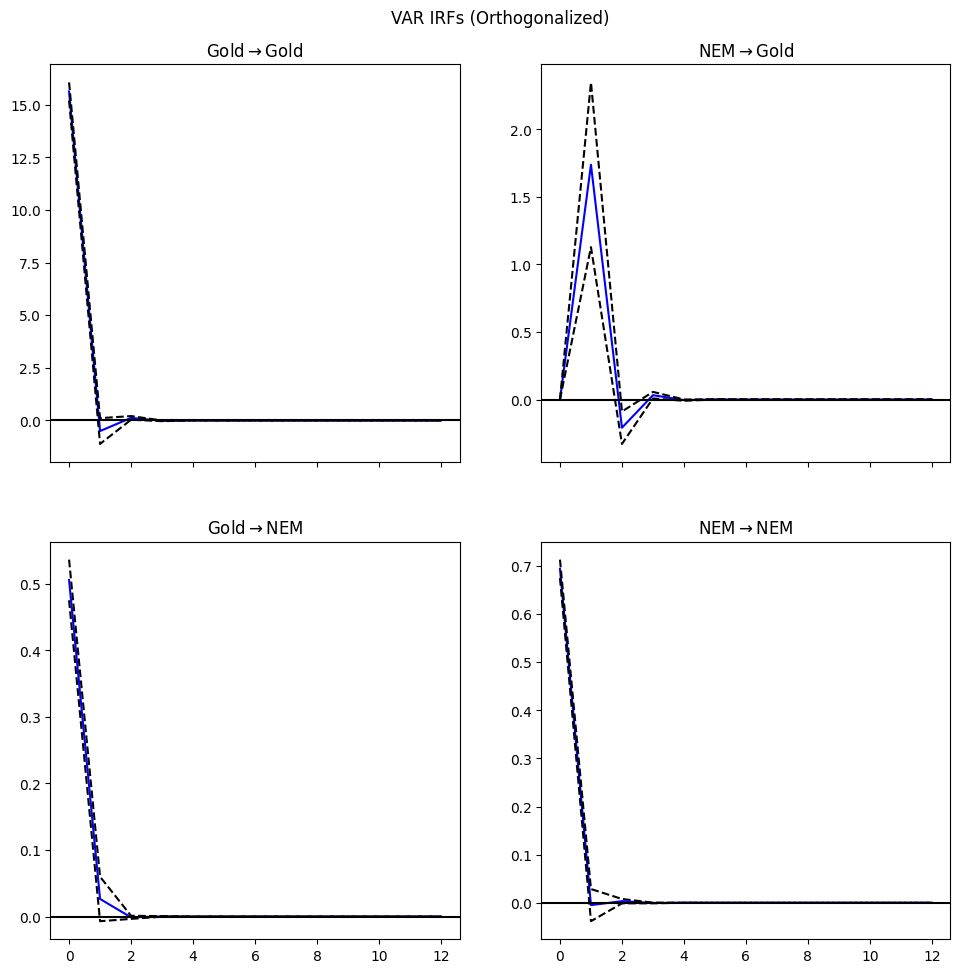

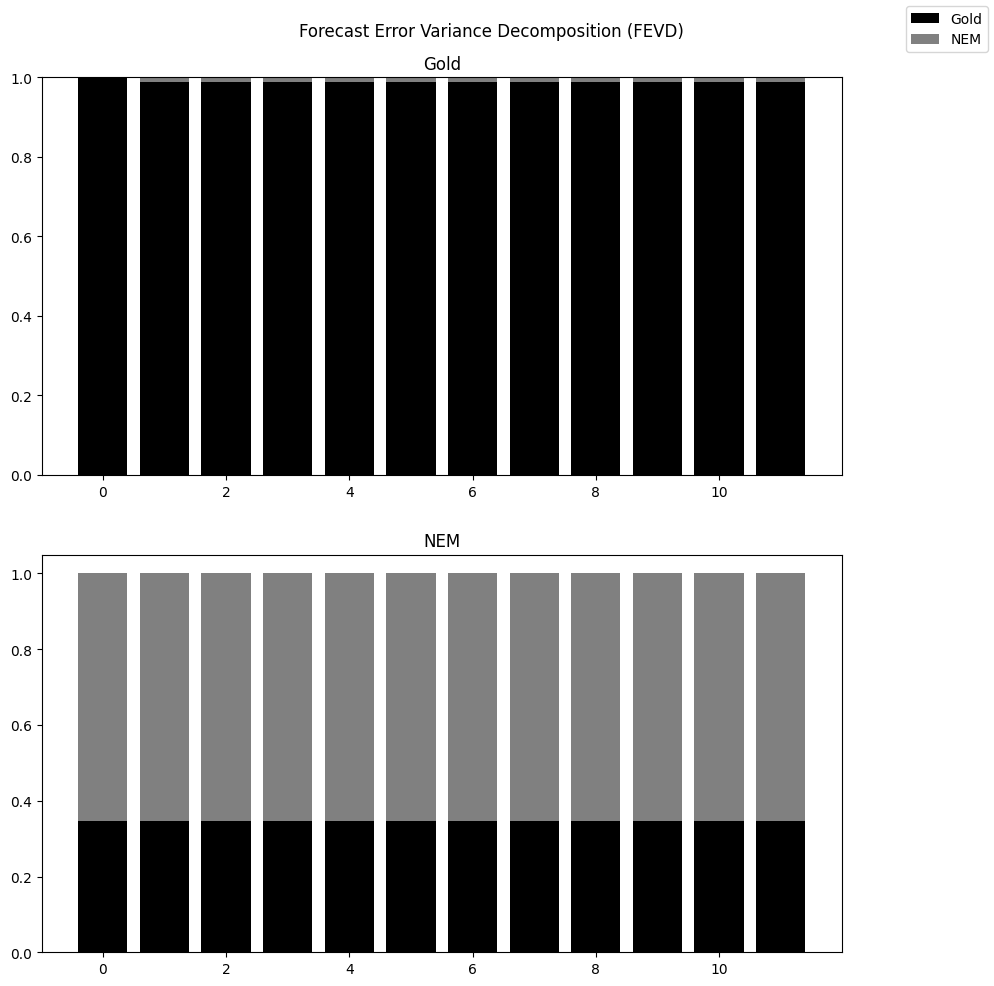

[*********************100%***********************]  2 of 2 completed


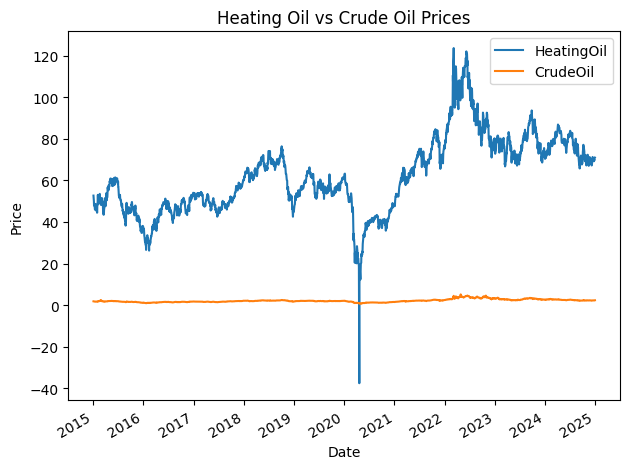

HeatingOil ADF: -2.1469, p=0.2261
HeatingOil ΔADF: -34.1840, p=0.0000
CrudeOil ADF: -1.9305, p=0.3179
CrudeOil ΔADF: -21.6170, p=0.0000
Trace Statistic: [50.96382923  4.8986314 ]
Critical Values (90%, 95%, 99%):
 [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Det. terms outside the coint. relation & lagged endog. parameters for equation HeatingOil
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
L1.HeatingOil    -0.2594      0.022    -11.571      0.000      -0.303      -0.215
L1.CrudeOil       3.9728      0.792      5.019      0.000       2.421       5.524
Det. terms outside the coint. relation & lagged endog. parameters for equation CrudeOil
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
L1.HeatingOil -7.561e-06      0.001     -0.012      0.991      -0.001       0.001
L1.CrudeOil       0.0827      0.023      3.633      0.000       0.038       0.127
             Loading coefficients (alpha) for equation HeatingOil             
                 coef    std err          z      P>|z|      [0.025      0.975]
--------

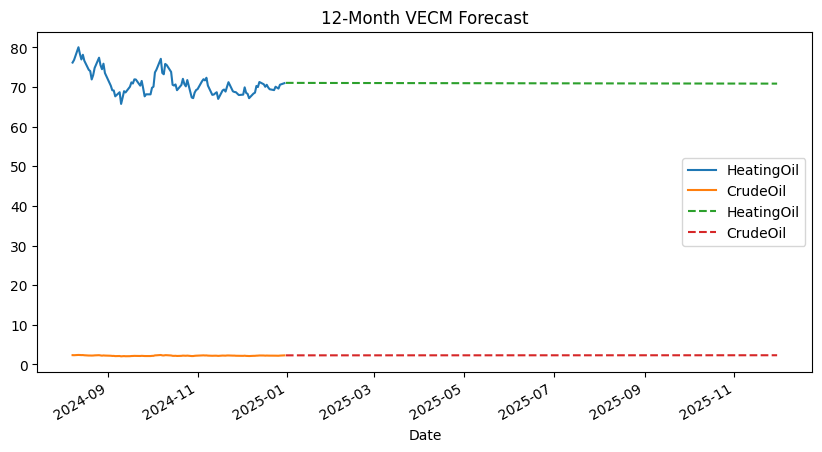

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 25, Apr, 2025
Time:                     13:44:20
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -4.39499
Nobs:                     2511.00    HQIC:                  -4.40386
Log likelihood:          -1584.52    FPE:                  0.0121684
AIC:                     -4.40891    Det(Omega_mle):       0.0121394
--------------------------------------------------------------------
Results for equation HeatingOil
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.009501         0.041974            0.226           0.821
L1.HeatingOil        -0.265166         0.022203          -11.943           0.000
L1.CrudeOil           4.100550         0.789186        

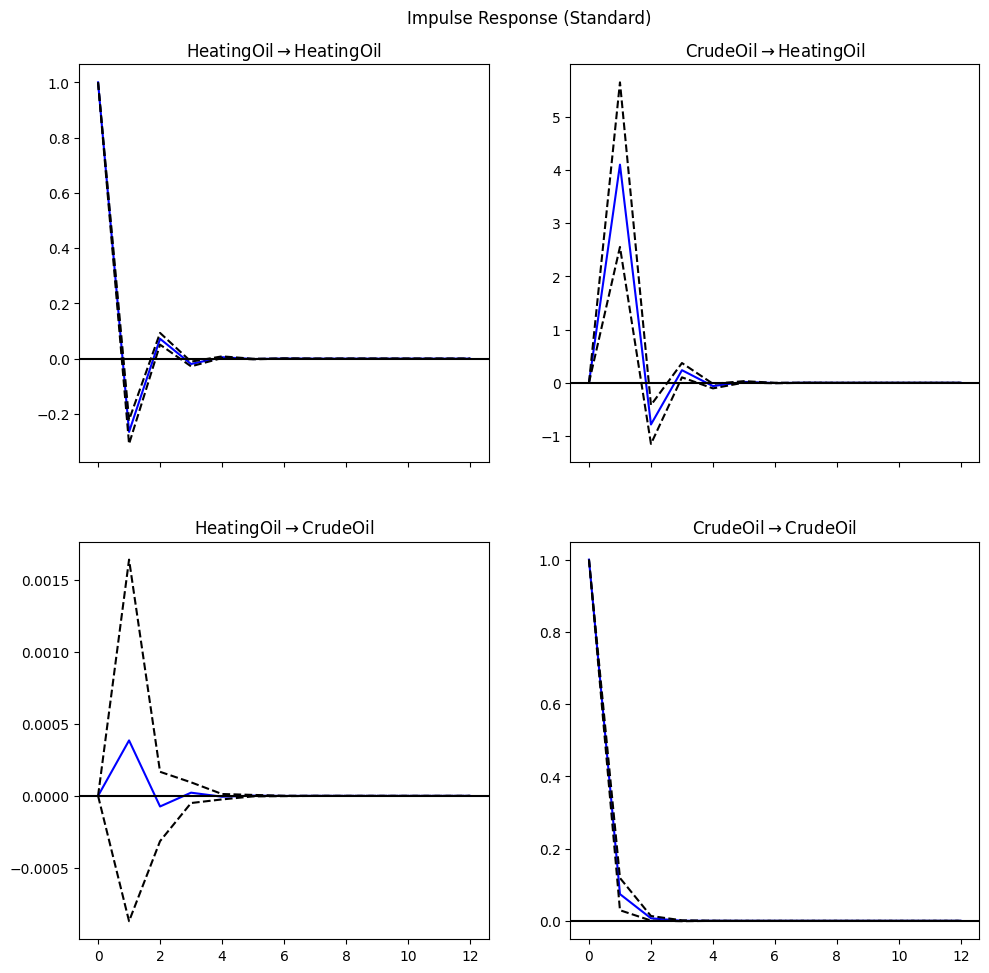

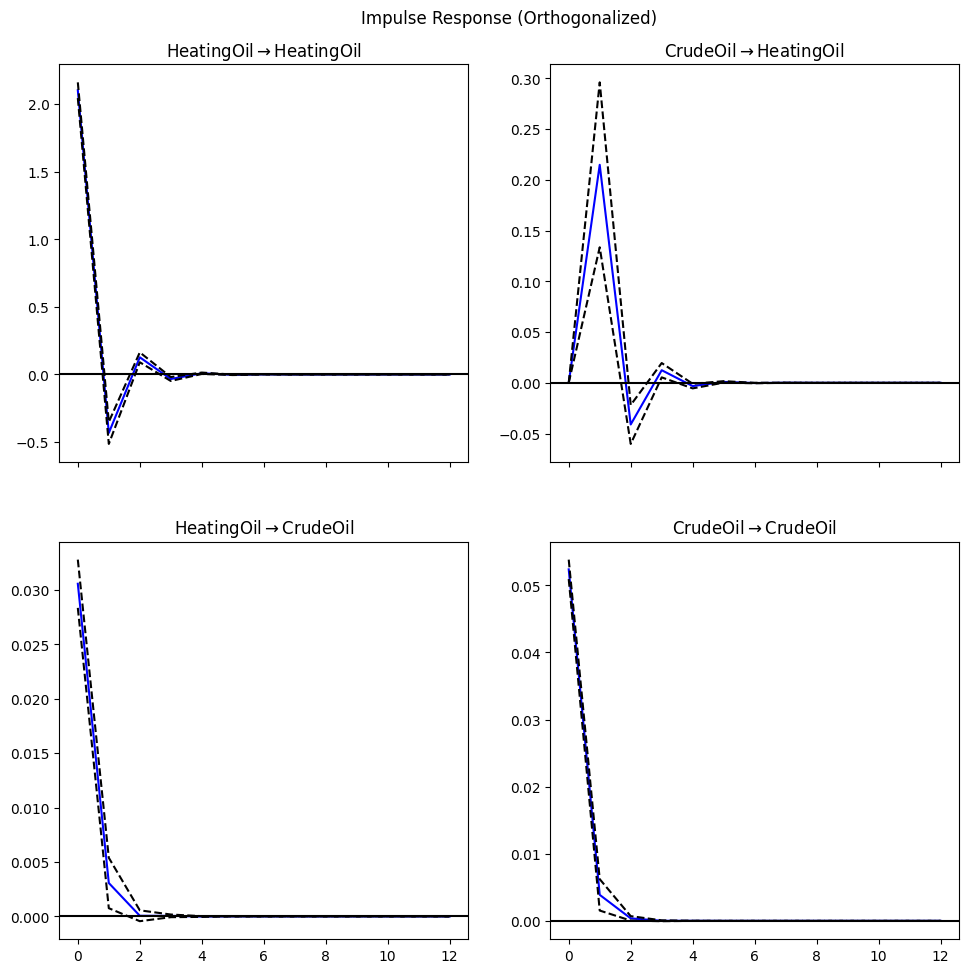

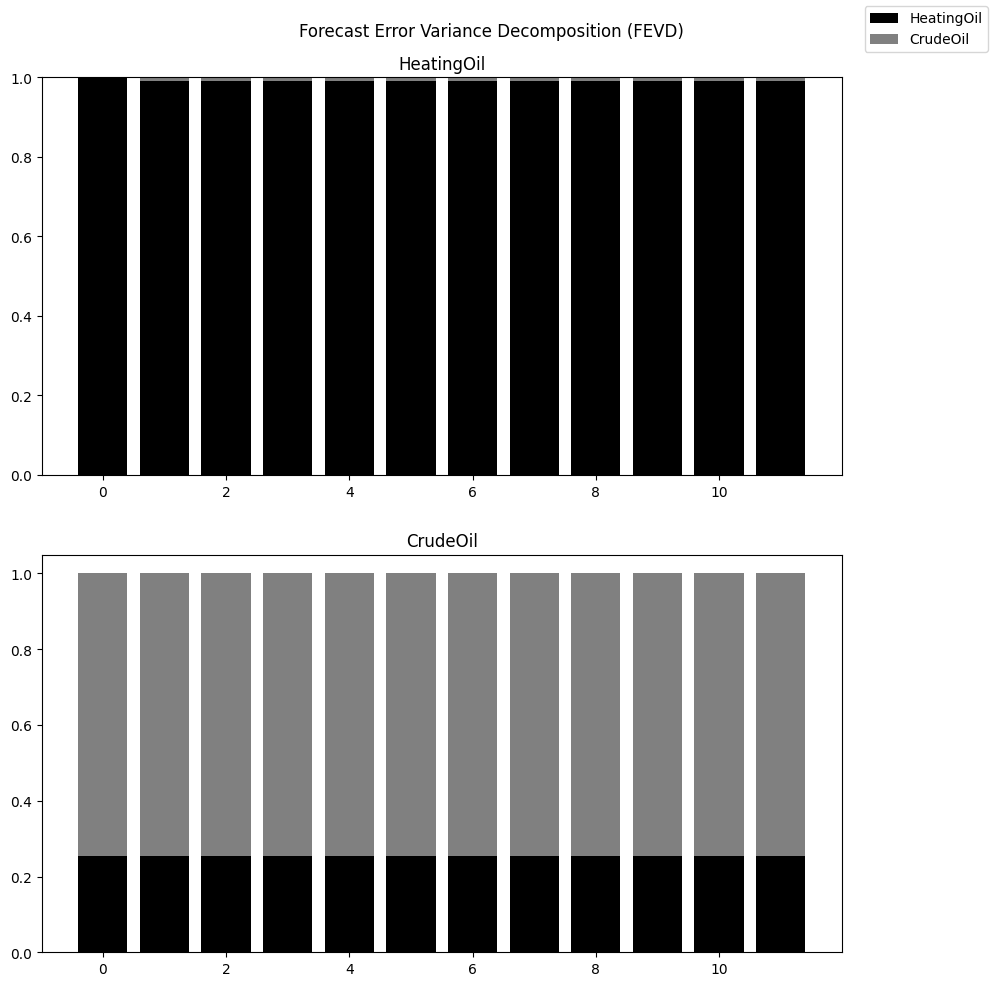

In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller


def fetch_data(symbols, start="2015-01-01", end="2024-12-31"):
    df = yf.download(symbols, start=start, end=end)['Close'].dropna()
    df.columns = ['HeatingOil', 'CrudeOil']
    return df


def plot_series(df, filename="cointegration_series.png"):
    df.plot(title="Heating Oil vs Crude Oil Prices")
    plt.ylabel("Price")
    plt.xlabel("Date")
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()


def adf_summary(df):
    for col in df.columns:
        result = adfuller(df[col])
        print(f"{col} ADF: {result[0]:.4f}, p={result[1]:.4f}")
        result_diff = adfuller(df[col].diff().dropna())
        print(f"{col} ΔADF: {result_diff[0]:.4f}, p={result_diff[1]:.4f}")


def johansen_test(df):
    result = coint_johansen(df, det_order=0, k_ar_diff=1)
    print("Trace Statistic:", result.lr1)
    print("Critical Values (90%, 95%, 99%):\n", result.cvt)
    return result


def fit_vecm(df, lags=1, rank=1):
    model = VECM(df, k_ar_diff=lags, coint_rank=rank)
    res = model.fit()
    print(res.summary())
    return res


def forecast_vecm(res, df, steps=12):
    forecast = res.predict(steps=steps)
    future_idx = pd.date_range(df.index[-1], periods=steps, freq='ME')
    forecast_df = pd.DataFrame(forecast, columns=df.columns, index=future_idx)

    df[-100:].plot(figsize=(10, 5), label='Historical')
    forecast_df.plot(ax=plt.gca(), style='--')
    plt.title("12-Month VECM Forecast")
    plt.savefig("vecm_forecast.png")
    plt.show()


def run_var_irf_fevd(df_diff, lags=1, horizon=12):
    model = VAR(df_diff)
    res = model.fit(maxlags=lags)
    print(res.summary())

    irf = res.irf(horizon)
    irf.plot(orth=False)
    plt.suptitle("Impulse Response (Standard)")
    plt.savefig("var_irf_standard.png")
    plt.show()

    irf.plot(orth=True)
    plt.suptitle("Impulse Response (Orthogonalized)")
    plt.savefig("var_irf_orthogonalized.png")
    plt.show()

    fevd = res.fevd(horizon)
    fevd.plot()
    plt.suptitle("Forecast Error Variance Decomposition (FEVD)")
    plt.savefig("var_fevd.png")
    plt.show()


def main():
    symbols = ['HO=F', 'CL=F']  # Heating Oil and Crude Oil
    df = fetch_data(symbols)
    plot_series(df)
    adf_summary(df)

    johansen_test(df)
    vecm_res = fit_vecm(df, lags=1, rank=1)
    forecast_vecm(vecm_res, df)

    df_diff = df.diff().dropna()
    run_var_irf_fevd(df_diff, lags=1, horizon=12)


if __name__ == "__main__":
    main()


In [13]:
def forecast_vecm(res, df, steps=12):
    # Forecast differences
    diffs = res.predict(steps=steps)
    last_obs = df.iloc[-1].values

    # Reconstruct levels from last observed value
    forecast_levels = [last_obs]
    for diff in diffs:
        forecast_levels.append(forecast_levels[-1] + diff)
    forecast_array = np.array(forecast_levels[1:])

    # Create forecast DataFrame
    future_idx = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods=steps, freq='ME')
    forecast_df = pd.DataFrame(forecast_array, columns=df.columns, index=future_idx)

    # Plot forecast with historical context
    ax = df[-100:].plot(figsize=(10, 5), label='Historical')
    forecast_df.plot(ax=ax, style='--')
    plt.title("12-Month VECM Forecast")
    plt.savefig("vecm_forecast_corrected.png")
    plt.show()


<ipython-input-13-d1eec128401d>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_idx = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods=steps, freq='M')


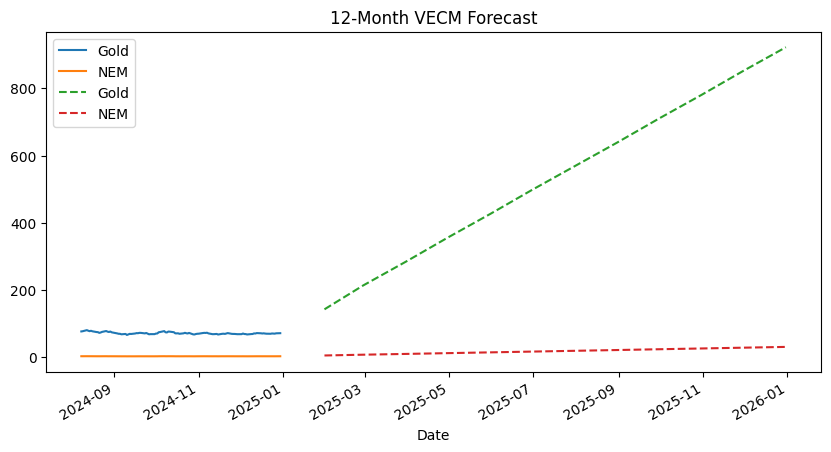

In [14]:
forecast_vecm(vecm_res, df)

In [15]:
def forecast_vecm(res, df, steps=12):
    # Use simulate_var for stable multi-step forecasting
    sim_forecast = res.simulate_var(steps=steps)

    # Create datetime index
    future_idx = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=steps, freq='ME')
    forecast_df = pd.DataFrame(sim_forecast, columns=df.columns, index=future_idx)

    # Plot historical and forecast
    ax = df[-100:].plot(figsize=(10, 5), label='Historical')
    forecast_df.plot(ax=ax, style='--')
    plt.title("12-Month VECM Forecast")
    plt.savefig("vecm_forecast_corrected_simulated.png")
    plt.show()
forecast_vecm(vecm_res, df)

AttributeError: 'VECMResults' object has no attribute 'simulate_var'